In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import zipfile

In [6]:
train_dir = './train/'
test_dir = './test1/'



In [34]:
train_data = os.listdir(train_dir)
categories = []
for file in train_data:
    category = file.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')
df = pd.DataFrame({'filename' : train_data, 
                   'category' : categories})

In [8]:
print(df.head())
print(df.tail())


       filename category
0  dog.8949.jpg      dog
1  cat.1062.jpg      cat
2  dog.6008.jpg      dog
3  dog.6540.jpg      dog
4  dog.9429.jpg      dog
            filename category
24995   dog.8110.jpg      dog
24996  dog.11121.jpg      dog
24997   dog.2192.jpg      dog
24998  dog.11047.jpg      dog
24999   cat.2129.jpg      cat


In [9]:
print('No. of cat images: ',len(df[df['category'] == 'cat']))
print('No. of cat images: ',len(df[df['category'] == 'dog']))


No. of cat images:  12500
No. of cat images:  12500


In [11]:
model = Sequential()

# 3 Convolutional, Pooling, Dropout layers
model.add(Conv2D(8, 
                 (3,3), 
                 activation = 'relu', 
                 input_shape = (150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(16, 
                 (3, 3),
                 activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(32, 
                 (3,3), 
                 activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Dense layers start
model.add(Flatten())

model.add(Dense(1024, 
                activation = 'relu'))
model.add(Dropout(0.45))

model.add(Dense(256, 
                activation = 'tanh'))
model.add(Dropout(0.45))

model.add(Dense(2, 
                activation = 'sigmoid'))


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        4

In [14]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])


In [15]:
train_df, val_df = train_test_split(df, 
                                    test_size = 0.25)
train_df = train_df.reset_index(drop = True)
val_df = val_df.reset_index(drop = True)


In [16]:
print("Train size: ", len(train_df))
print("Validation size: ", len(val_df))


Train size:  18750
Validation size:  6250


In [17]:
print("Dogs in train set: ", len(train_df[train_df['category'] == 'dog']))
print("Cats in train set: ", len(train_df[train_df['category'] == 'cat']))
print("Dogs in validation set: ", len(val_df[val_df['category'] == 'dog']))
print("Cats in validation set: ", len(val_df[val_df['category'] == 'cat']))


Dogs in train set:  9359
Cats in train set:  9391
Dogs in validation set:  3141
Cats in validation set:  3109


In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                    './train/', 
                                                    x_col = 'filename', 
                                                    y_col = 'category', 
                                                    target_size =(150, 150), 
                                                    class_mode = 'categorical', 
                                                    batch_size = 20, 
                                                    color_mode = 'rgb', 
                                                    shuffle = True)

val_generator = val_datagen.flow_from_dataframe(val_df, 
                                                    './train/', 
                                                    x_col = 'filename', 
                                                    y_col = 'category', 
                                                    target_size =(150, 150), 
                                                    class_mode = 'categorical', 
                                                    batch_size = 20, 
                                                    color_mode = 'rgb', 
                                                    shuffle = True)

Found 18750 validated image filenames belonging to 2 classes.
Found 6250 validated image filenames belonging to 2 classes.


In [20]:
history = model.fit(
    train_generator, 
    steps_per_epoch = len(train_df)//64, 
    epochs = 20, 
    validation_data = val_generator, 
    validation_steps = len(val_df)//64)


Epoch 1/20
292/292 [==============================] - 23s 79ms/step - loss: 0.4724 - accuracy: 0.7726 - val_loss: 0.5351 - val_accuracy: 0.7443
Epoch 2/20
292/292 [==============================] - 21s 72ms/step - loss: 0.4656 - accuracy: 0.7759 - val_loss: 0.5104 - val_accuracy: 0.7526
Epoch 3/20
292/292 [==============================] - 23s 78ms/step - loss: 0.4541 - accuracy: 0.7880 - val_loss: 0.5070 - val_accuracy: 0.7608
Epoch 4/20
292/292 [==============================] - 21s 73ms/step - loss: 0.4318 - accuracy: 0.8053 - val_loss: 0.4812 - val_accuracy: 0.7753
Epoch 5/20
292/292 [==============================] - 21s 73ms/step - loss: 0.4131 - accuracy: 0.8080 - val_loss: 0.4649 - val_accuracy: 0.8000
Epoch 6/20
292/292 [==============================] - 23s 78ms/step - loss: 0.4036 - accuracy: 0.8223 - val_loss: 0.4577 - val_accuracy: 0.7912
Epoch 7/20
292/292 [==============================] - 21s 72ms/step - loss: 0.3963 - accuracy: 0.8252 - val_loss: 0.4451 - val_accuracy:

In [22]:
model.save_weights('cats_vs_dogs_WEIGHTS.h5')


In [23]:
print('Training accuracy: {:.3f}'.format(history.history['accuracy'][-1]))
print('Validation accuracy: {:.3f}'.format(history.history['val_accuracy'][-1]))


Training accuracy: 0.910
Validation accuracy: 0.817


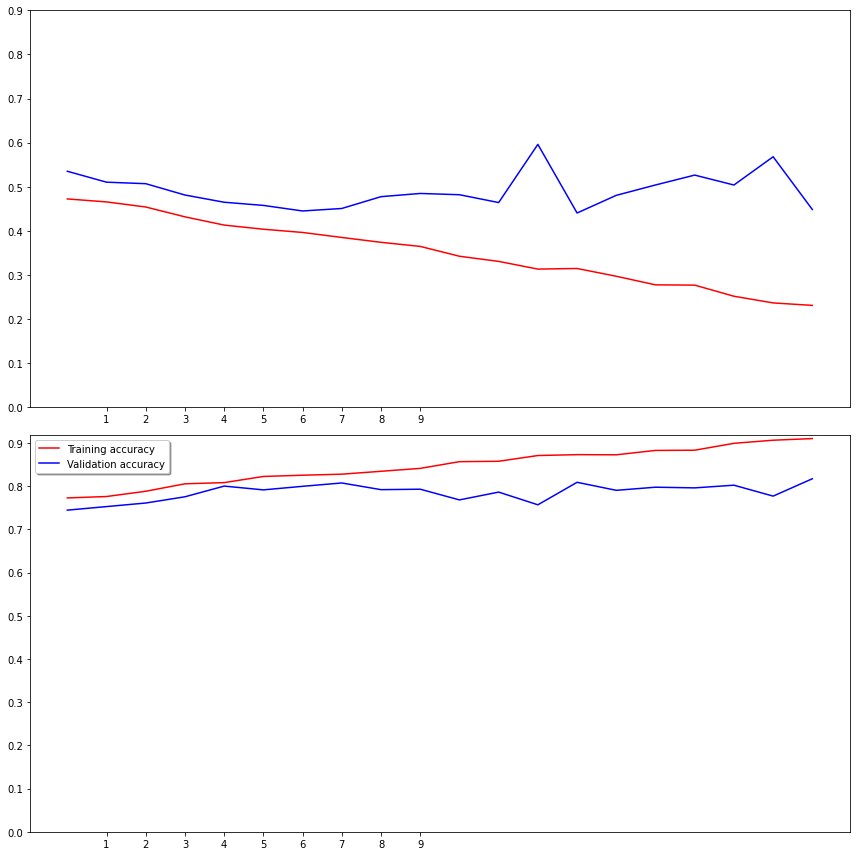

In [24]:
fig,(ax1, ax2) = plt.subplots(2, 1, figsize = (12,12))
ax1.plot(history.history["loss"], color= "red", label = "Training loss")
ax1.plot(history.history["val_loss"], color= "b", label = "Validation loss")

ax1.set_xticks(np.arange(1, 10, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history["accuracy"], color = "red", label = "Training accuracy")
ax2.plot(history.history["val_accuracy"], color = "b", label = "Validation accuracy")

ax2.set_xticks(np.arange(1,10, 1))
ax2.set_yticks(np.arange(0, 1, 0.1))

legend = plt.legend(loc = "best", shadow = True)
plt.tight_layout()
plt.show()

In [58]:
test_dir = "./mustest/"
test_data = os.listdir(test_dir)
test_df = pd.DataFrame({
    "filename" : test_data
})


In [59]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    test_dir,
    target_size = (150, 150),
    x_col = "filename",
    y_col = None,
    batch_size = 10,
    class_mode = None,
    shuffle = True,
    color_mode="rgb",
)


Found 2 validated image filenames.


In [60]:
predicted = model.predict(test_generator)
test_df['category'] = np.argmax(predicted, axis = 1)


In [61]:
test_df

,filename,category
0,ty.jpg,0
1,test33.jpg,1


In [40]:
test_df['id'] = test_df['filename'].str.split('.').str[0]
test_df['label'] = test_df['category']
test_df.drop(['filename', 'category'], axis = 1, inplace = True)
test_df.to_csv('submission.csv', index = False)

In [44]:
import csv
csv.register_dialect('myDialect',
                     delimiter='|',
                     skipinitialspace=True,
                     quoting=csv.QUOTE_ALL)

with open('submission
.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, dialect='myDialect')
    for row in reader:
        print(row)


Streaming output truncated to the last 5000 lines.
['2734,1']
['12313,0']
['9330,1']
['12091,0']
['2369,0']
['4492,1']
['2696,1']
['1694,1']
['8033,1']
['4356,1']
['9973,1']
['8160,0']
['3298,1']
['10569,0']
['9851,0']
['932,1']
['10315,1']
['10009,0']
['3609,1']
['1493,0']
['7484,0']
['4764,0']
['4912,0']
['5516,1']
['9995,0']
['8321,0']
['9989,1']
['5358,1']
['3138,1']
['1201,1']
['5115,1']
['9175,1']
['11574,1']
['10525,1']
['4343,1']
['10431,0']
['967,0']
['11358,0']
['5211,0']
['4000,0']
['6540,0']
['2009,0']
['2767,0']
['11831,0']
['11453,0']
['8006,1']
['7528,1']
['9667,0']
['8911,1']
['11511,0']
['2623,1']
['11097,0']
['5425,1']
['5080,1']
['12299,1']
['9431,1']
['1675,0']
['8836,0']
['11110,0']
['9560,1']
['9268,0']
['4530,1']
['1913,0']
['7885,1']
['2022,0']
['3573,1']
['2347,0']
['11572,1']
['5962,0']
['7615,1']
['10139,1']
['3119,0']
['3488,0']
['723,1']
['8525,1']
['5580,0']
['8704,1']
['5654,0']
['1453,0']
['146,0']
['9648,1']
['5669,1']
['10325,1']
['2717,1']
['10034,0']